# Quantum circuits for simulating quantum systems

### FRIB-TA Summer School in Quantum Computing
#### Monday, June 20th 2022
#### Led by: Dean Lee, Zhengrong Qian, Jacob Watkins


Congrats on almost finishing Day 1 of the summer school! The purpose of this set of hands-on activities is to help reinforce the concepts you've learned in lecture and put them into practice. You will work in small groups at your own pace, and the organizers will be available to answer questions and help you get unstuck. The main learning goals for this activity are as follows


1.   Verify a circuit identity through code and reasoning, to gain practice with manipulating circuits and concepts such as *phase kickback*.
2.   Construct a quantum circuit for to estimate the energies of the *number operator*, which represents the occupation number of a bosonic mode (aka a harmonic oscillator eigenstate). 

Some helpful resources for this activity include:


1.   [This paper](https://www.nature.com/articles/s41534-019-0217-0) by Smith et. al. 
2.   [Phase estimation: Qiskit textbook](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html)

Have fun!




## Setup

In [29]:
try:
  import qiskit
except ImportError:
  !pip install qiskit~=0.20.0 pylatexenc --quiet


# Set up
import numpy as np
from qiskit.tools.visualization import plot_histogram
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer
from qiskit.providers.ibmq.managed import IBMQJobManager
%matplotlib inline             
import matplotlib.pyplot as plt

## Part 1: Flipping a CNOT using Hadamards


Equation (25) of the Smith paper shows how a CNOT gate can be flipped through Hadamard gates. 

![picture](https://drive.google.com/uc?id=1drJn8t5EC26_LuUuwih5T1w3h2jvMCt5)

What this circuit demonstrates is that, contrary to appearance, the CNOT gate cannot be said to "act on" one qubit and leave the other alone. By changing the state of each qubit individually (through Hadamards) we can change the control qubit to the target qubit. We will check this circuit identity in three ways:


Method 1:   Direct matrix computation \\
Method 2:   Algebraic manipulation \\
Method 3:   Circuit construction with qiskit.


### Method 1: Matrix computation



This section will outline how to verify the identity through direct matrix computation. In order to do this properly, we will need to know the matrix representation for each operator in some basis. For quantum computing, the natural choice is usually the "computational basis" (basis of 0's and 1's, in which the pauli $Z$ is diagonal). 

**Exercise 1** Convince yourselves that equations (24) and (25) of [Smith et. al.](https://www.nature.com/articles/s41534-019-0217-0) give the right matrix representation of $\text{CNOT}$ in the computational basis. How is the ordering of the columns/rows chosen?

We can express the graphical circuit equation (25) in notation more similar to linear algebra as follows.

$$ \text{CNOT}_{21} = H^{\otimes 2} \text{CNOT}_{12} H^{\otimes 2}$$

Here, the index $21$ indicates which is the "control" qubit and which is the "target". The NOT gate acts on the target. We now need the matrix form for $H^{\otimes 2}$. For two bitstring states $|a_1 a_2\rangle$ and $|b_1 b_2\rangle$, we can calculate the matrix elements by

$$ H^{\otimes 2}_{a_1, a_2;b_1,b_2} = \langle a_1|H | b_1 \rangle \times \langle a_2| H| b_2\rangle$$. 

where $a_j, b_j$ are 0 or 1 for $j =1,2$. A general formula for calculating the tensor product, coming from this exact idea, is given by (Nielsen and Chuang, pg 74).

![picture](https://drive.google.com/uc?id=1X5AY1Zf58Uzm8R6GGXi9pnq3j9y_1Vc6)

**Exercise 2** a) Use these formulas to calculate the matrix representation of $H^{\otimes 2}$. The matrix should be $4\times 4$, Hermitian and unitary. Does your result seem to satisfy these requirements? 

b) The *Kronecker product* is the name for the matrix multiplication which yields the tensor product representation. This can be done in numpy using the np.kron (or numpy.kron, depending on your import statement). Use numpy to calculate $H^{\otimes 2}$ and verify that it matches part a). 

In [15]:
# Insert code here


c) Using your favorite method of matrix multiplication, check that equation (25) is indeed satisfied. 

In [16]:
# Insert code here



array([[ 1.00000000e+00, -1.23259516e-32, -1.23259516e-32,
         1.23259516e-32],
       [ 1.23259516e-32, -1.23259516e-32, -1.23259516e-32,
         1.00000000e+00],
       [-1.23259516e-32,  1.23259516e-32,  1.00000000e+00,
        -1.23259516e-32],
       [-1.23259516e-32,  1.00000000e+00,  1.23259516e-32,
        -1.23259516e-32]])

While matrix manipulations are perhaps most straightforward, they are not always illuminating. It is not clear how you might *discover* this identity using these matrices. Moreover, the matrices could get quite large even for a small number of qubits. 


### Method 2: Algebraic manipulations



Let's see if we can understand more from algebraic manipulations of the circuit. We will make use of the fact that the Hadamard $H$ serves as a shift from the $Z$ to $X$ bases, and vice versa. 

**Exercise 3** Convince yourself that $H$ is both Hermitian and unitary. Argue that this implies $H^2 = I$. Such operators are called *reflection* operators; can you see why?

Work space (double click):

**Exercise 4** Every single-qubit gate has an interpretation as a rotation on the Bloch sphere. Based on the previous exercise, what is the rotation angle for $H$? Since $H$ sends $Z$ to $X$ and back, what is the rotation axis?

Work space (double click):

**Exercise 5** Convince yourself that $HXH =  Z$ and $HZH = X$. How does this relate to the findings of the previous few exercises?

Work space (double click):

Let's return to the circuit identity (25) and use what we now know. Since $HXH = Z$, we might like to say that

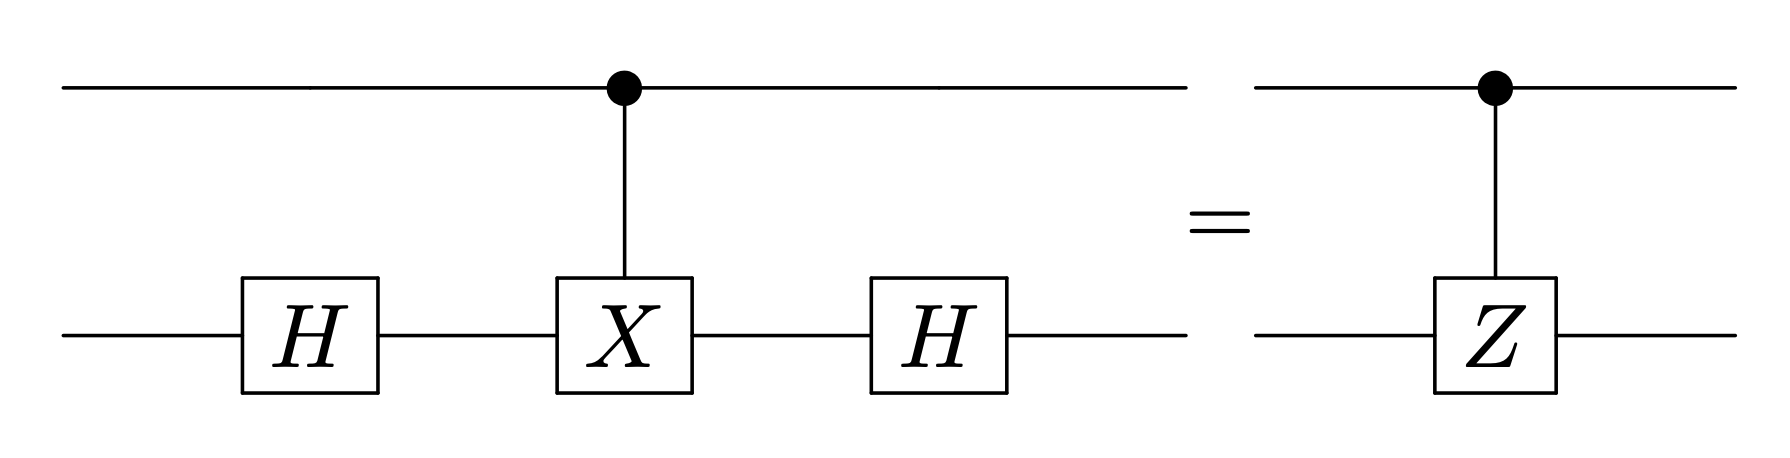

**Exercise 6** Is this true? Does $H (CX) H = C(HXH) = CZ$? Discuss this point with your group. Can you say something more generally about these types of manipulations?

Work space (double click):

**Answer:** Yes, this is valid!

How can we proceed from here? It turns out the $CZ$ gate (controlled-$Z$) exhibits a curious property: it is agnostic to which qubit is controlled and which is the target.

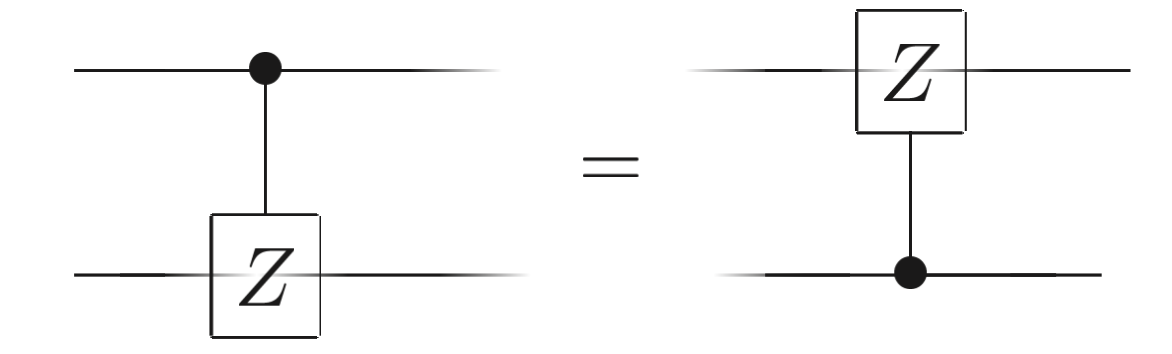

**Exercise 7:** Argue why this is true. 

Work space (double click):

This is the essence of phase kickback. When a phase is applied to one of the qubits, we can freely associate it with any other qubit in the system. Applied to phase estimation, this allows us to detect phase shifts on the auxiliary register to measure eigenvalues. Sometimes the $CZ$ is drawn just as a line between two qubits, to emphasize that it acts symmetrically.

The phase kickback step is the last big hill of the derivation. Using the tools we've developed, you should be able to finish the derivation of equation (25).

**Exercise 8** Finish the derivation of equation (25) of Smith, using tools from the previous exercise. 

In short, we used some simple commutation properties between $H, X,$ and $Z$ to prove the relation, along with the notion of phase kickback. Though we invoked more complicated tools than with matrix multiplication, hopefully it was also more illuminating. Moreover, these concepts will carry over to other scenarios.

### Method 3: Circuit construction with Qiskit



Finally, let's check the result by constructing a quantum circuit in Qiskit. 


1.   Construct a quantum circuit with two qubits
2.   Add gates corresponding to hadamards, CNOT, hadamards
3.   Verify that the circuit produces the expected result. Try different inputs!



In [19]:
# Insert code here



# Execute circuit on IBM's circuit simulator (uncomment and fill in)
#backend = Aer.get_backend('qasm_simulator') # could also use statevector simulator (with different steps)
#job = backend.run(____)
#result = job.result()
#counts = result.get_counts()
#plot_histogram(counts)

## Part 2: Simulating the number operator.

The harmonic oscillator is an incredibly important in physics. The quantum mechanical version is valuable for pedagogical reasons (being exactly solvable) and for representing bosonic systems. When diagonalized, the oscillator Hamiltonian is proportional (up to an additive constant) to the *number operator* $\hat{n}$. In this notebook, we will learn how to simulate the diagonalized number operator and perform phase estimation to extract the eigenvalues. More specifically, We will consider a subsystem of the number operator, $\hat{n}$, with the 4 lowest energy eigenstates included. While simulating diagonal Hamiltonians may seem uninteresting, it can form an important component to simulating more complicated systems using Trotterization, particularly when $H$ can be divided into pieces which are easily diagonalized. 

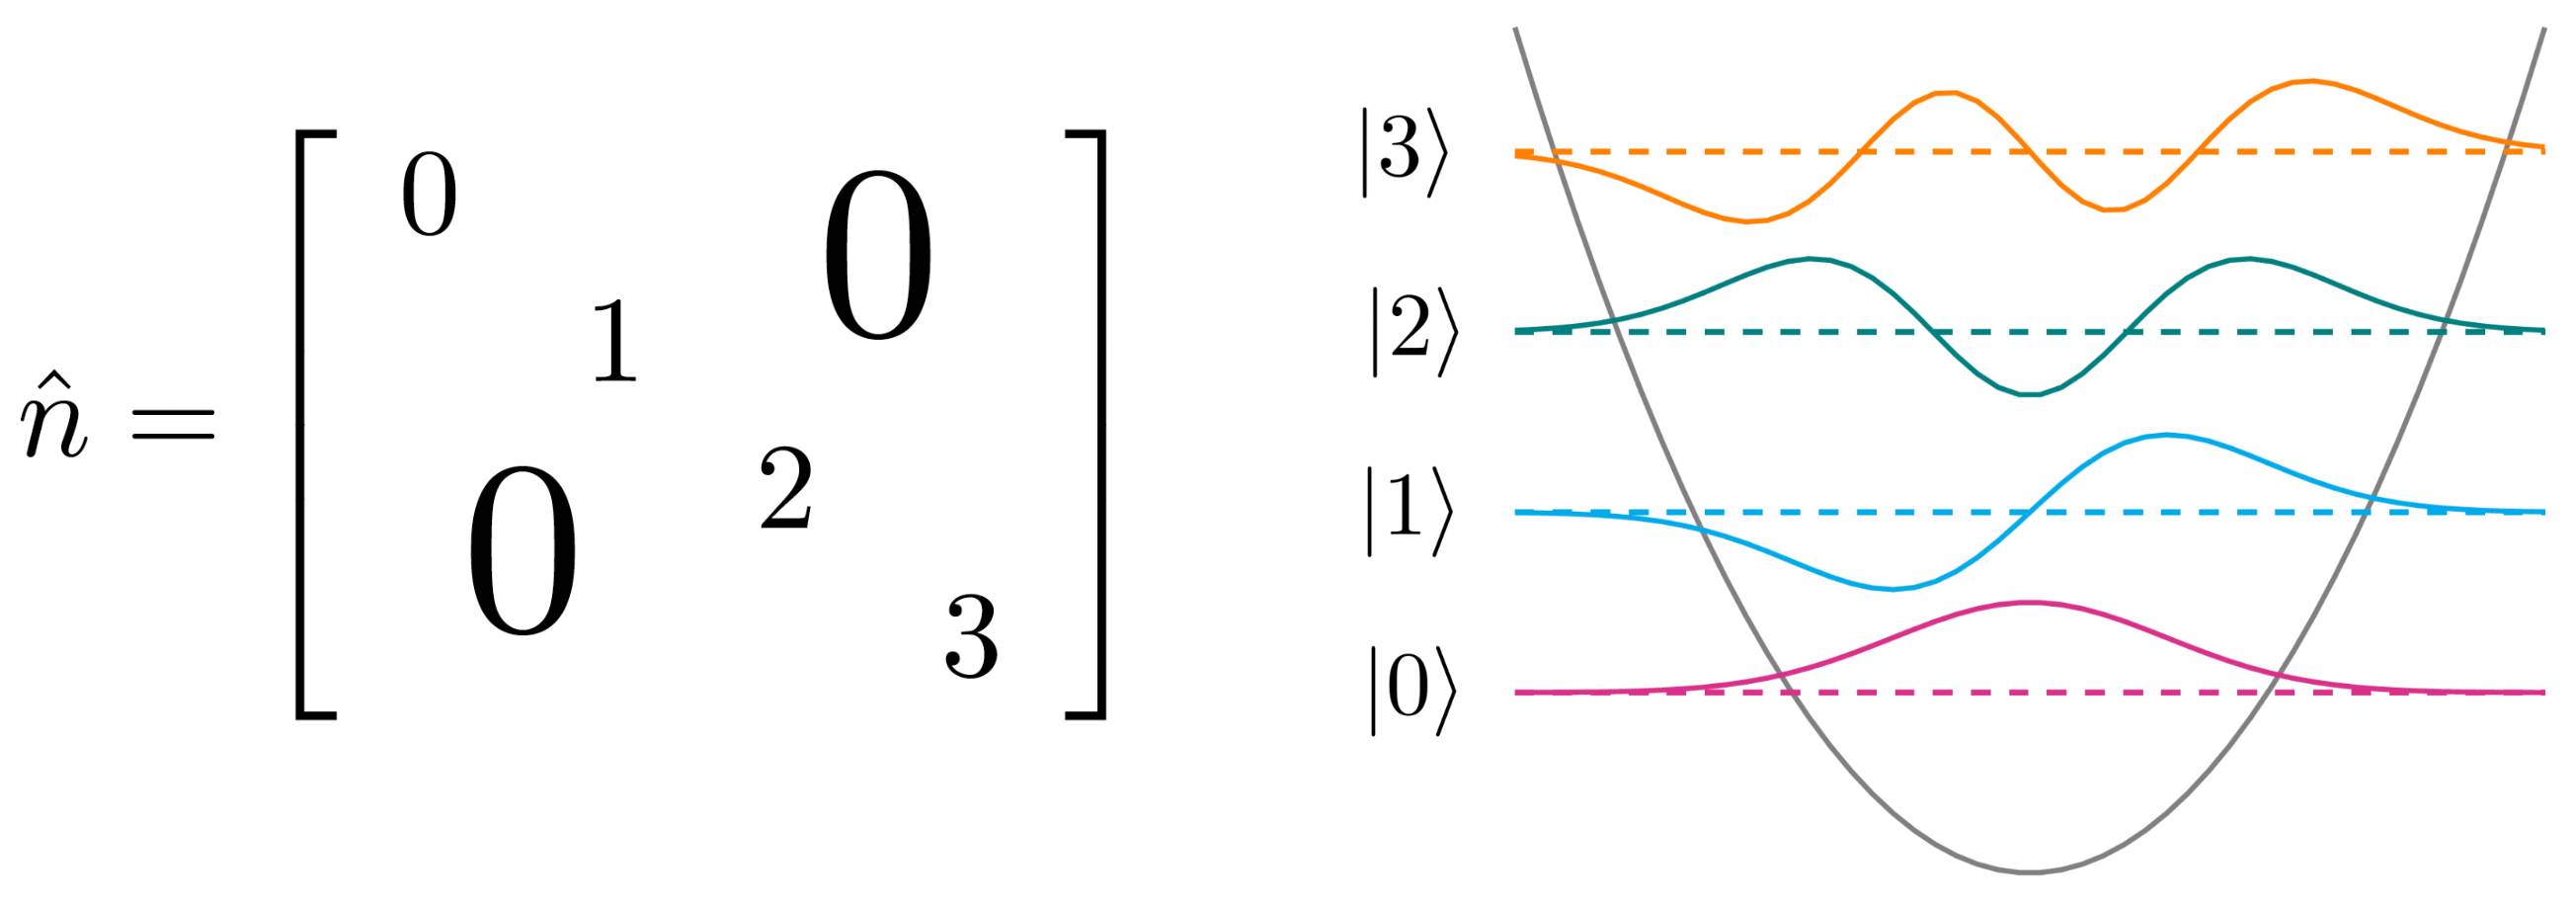

**Goal**: Use the standard phase estimation algorithm to estimate the eigenvalue of state $|2\rangle$. We use the fact that the *phase* of the time evolution operator $U(t) = e^{i H t}$ encodes the *energy* $E$ when applied to an eigenstate of $H$. By measuring the phase, for suitable choice of $t$, we can recover the sought after energy.

**Question**: How should we represent $|2\rangle$ as a 2-qubit state? (hint: think binary!) 

*(optional workspace, double click here)


**Standard Quantum Phase Estimation (QPE)**: the (standard) phase estimation circuit is drawn below: Resource: [Qiskit textbook on Quantum Phase Estimation](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html).

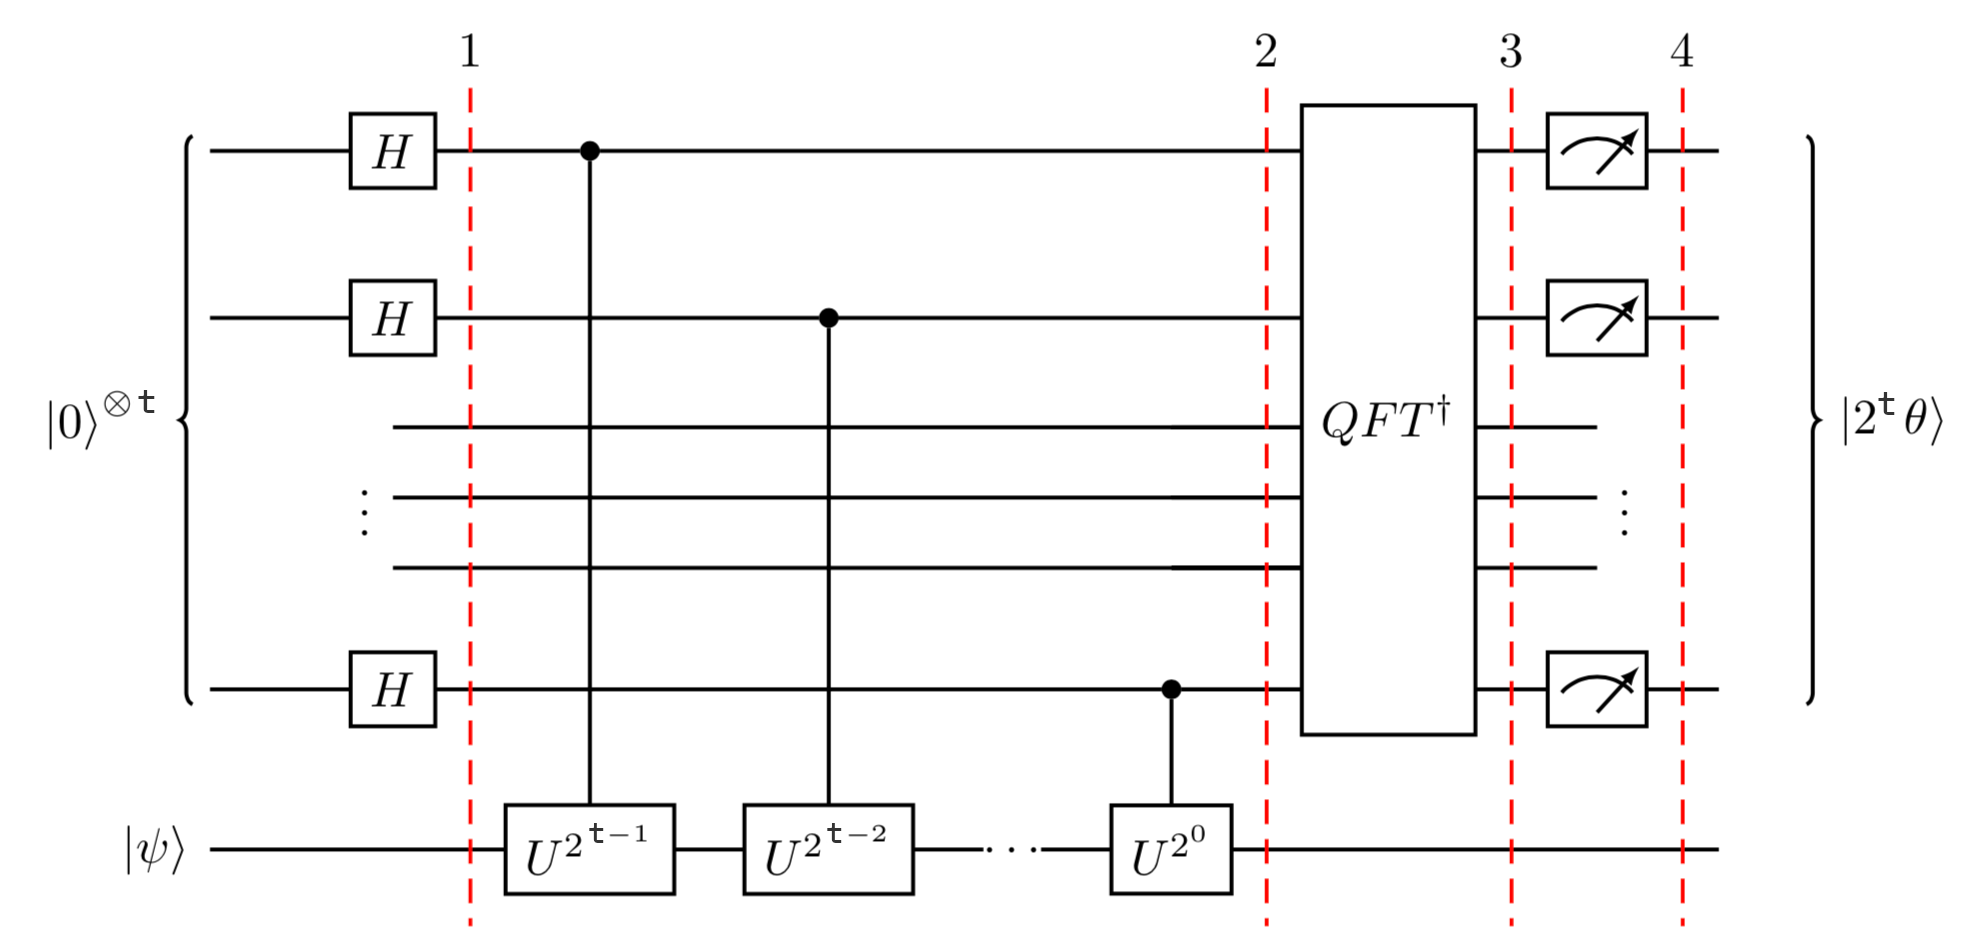

## Simulating the number operator.

To solve this problem, we first need to map our system to a quantum computer. By truncating the harmonic oscillator to four states, we only require two qubits to represent our eigenstate (for $L$ levels, how many qubits are necessary?).

We need to implement the evolution operator $U = e^{i \hat{n} t}$. We should be able to do this only with gates that are diagonal in the computational basis. One such gate is the *phase gate*. In Qiskit, it is parameterized with the variable $𝜑$, which is a rotation angle around the $z$-axis. 

$P(𝜑) = \begin{bmatrix} 1 & 0 \\
0 & e^{i𝜑} 
\end{bmatrix}$

**Question**: Suppose we have a truncated harmonic oscillator with 4 energy levels. It turns out this system can be simulated on a quantum computer using only phase gates. How many phase gates do we need to simulate the unitary operator, $e^{i\hat{n}t}$? What are the associated parameters? (Hint: you only need to consider the circuit acting on the computational basis $|00\rangle, |01\rangle, |10\rangle, |11\rangle$).

**For those who are interested** How could one simulate 8 levels? What about 10 levels?


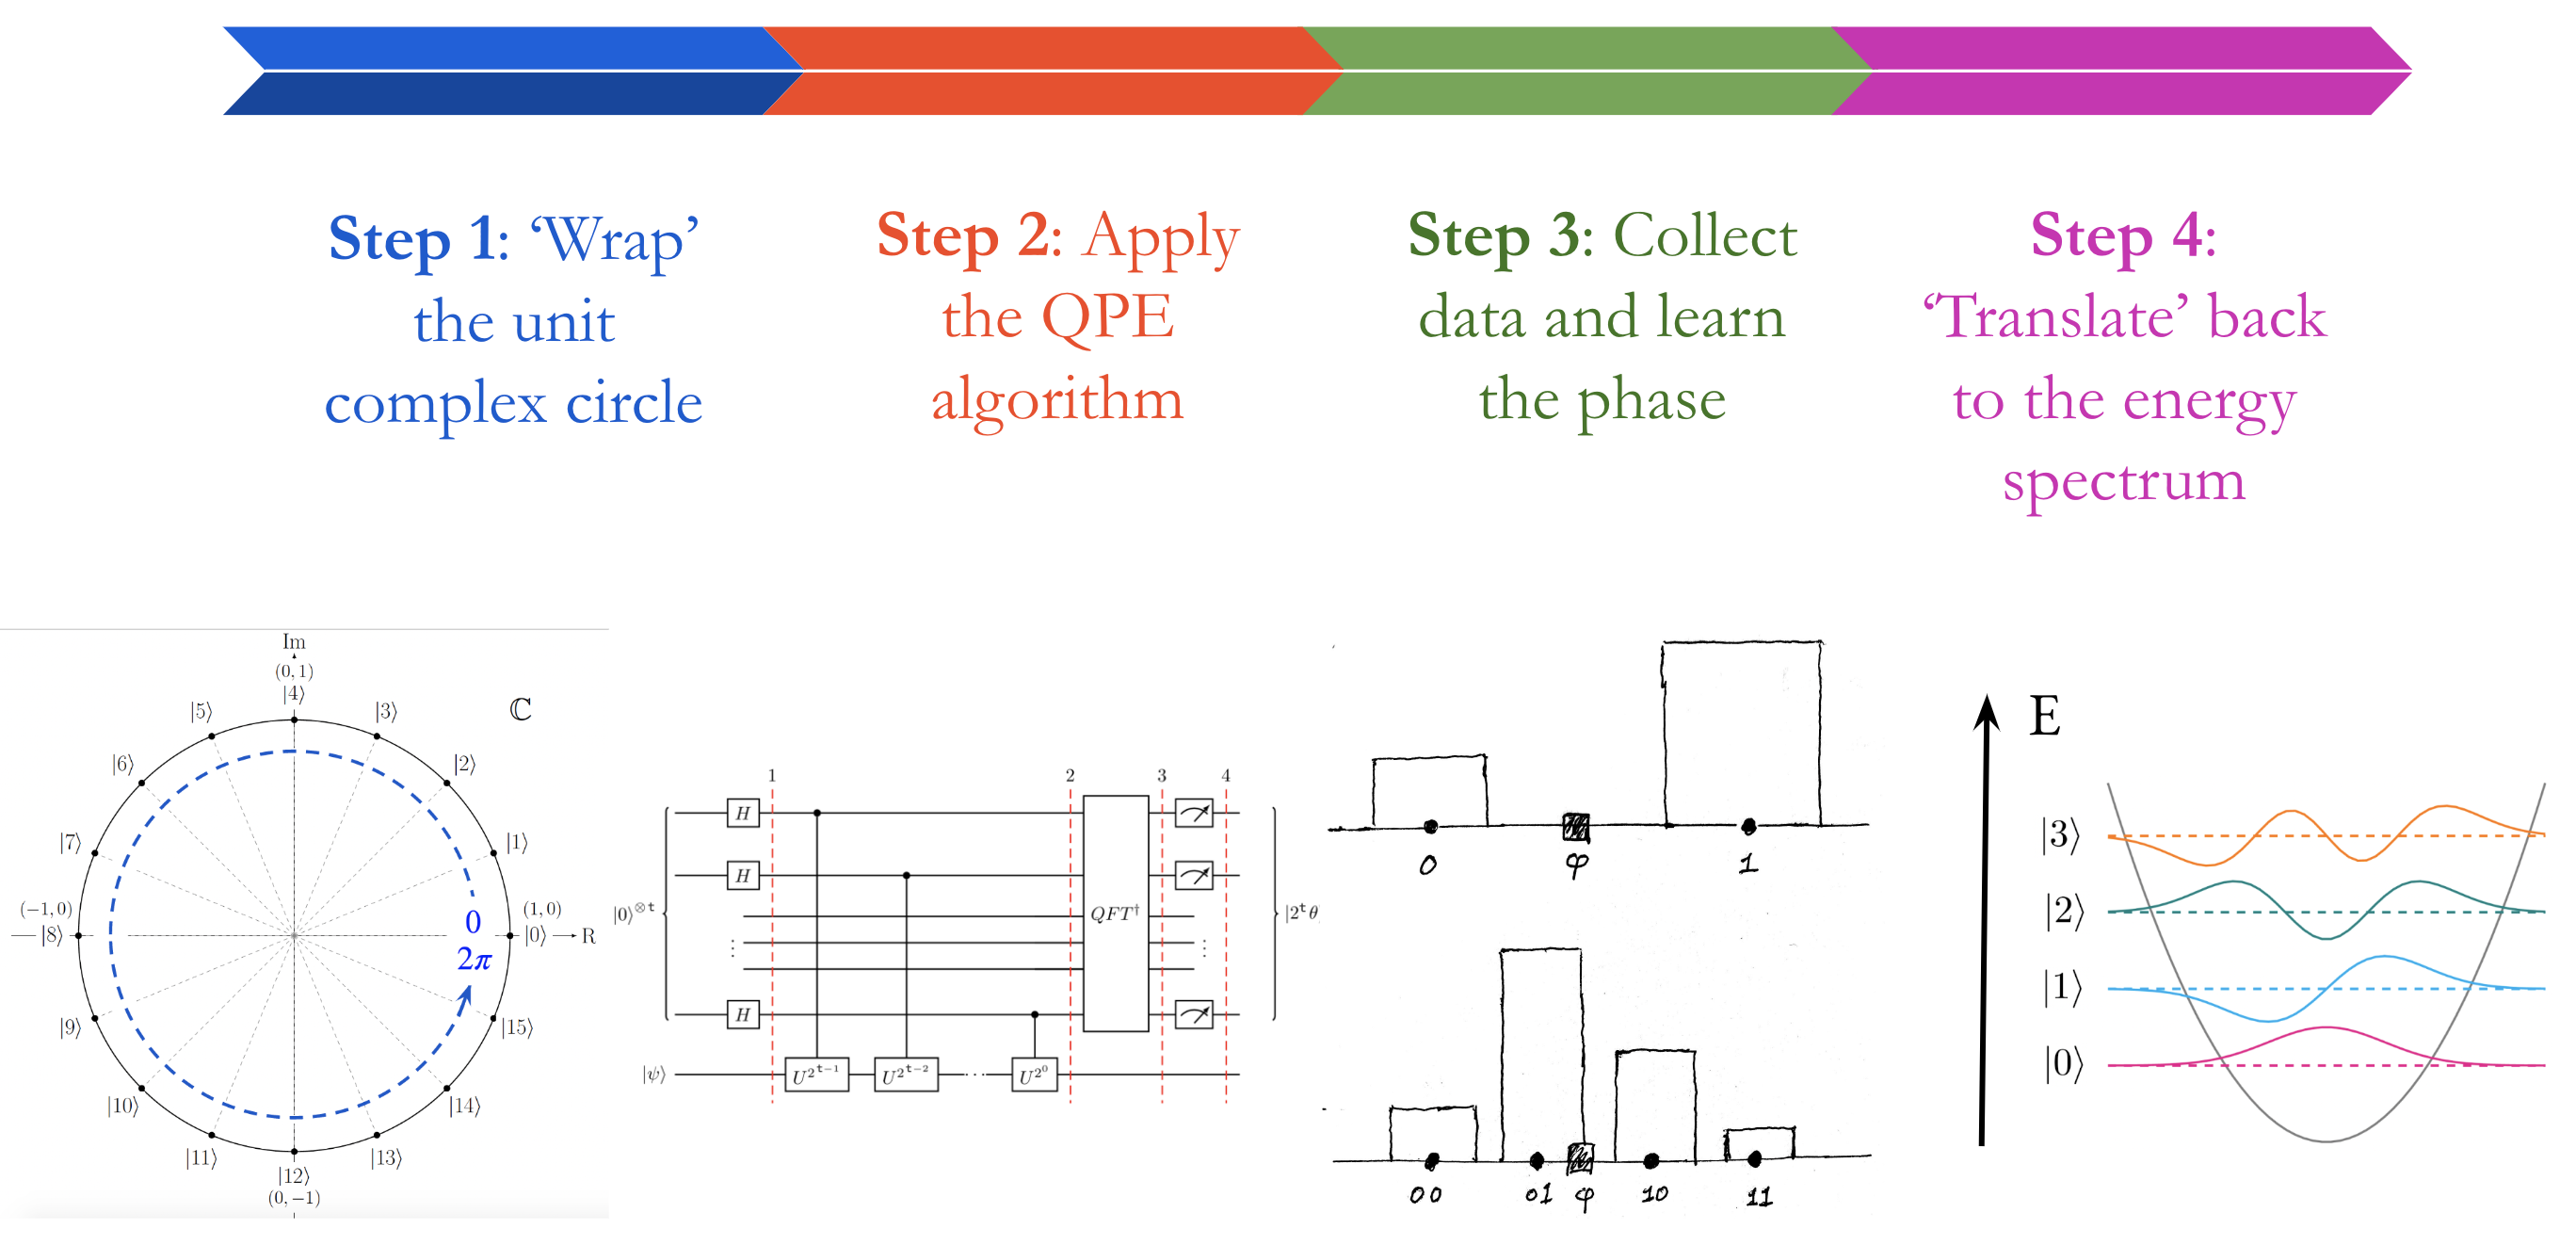

### Step 1: 'Wrap' the unit complex circle.

For simplicity, let's set $t=1$. The phase applied by the unitary $U = e^{iHt}$ will be $e^{2i}$ (why?). In the standard QPE algorithm, we actually read off $\varphi$ in binary, where $e^{i\cdot2t} = e^{2\pi i\varphi}$.

**Question:** What is $\varphi$ in binary? What is the allowed range of $\varphi$?

The number of bits of precision is determined by size of the "auxiliary" register (i.e. the additional qubits besides those to represent the oscillator state). The more qubits, the more bits of the binary representation of $\varphi$ that will be determined.

### Step 2: Apply the QPE algorithm.

Now let's start constructing the quantum circuit for the (standard) quantum phase estimation. First we will construct the controlled unitaries $CU$. To do this, we will use three qubits: one for the control and two for the system. Qubit 'zero' will be the control qubit, and qubit 2 will (somewhat confusingly, perhaps) be the "leading" qubit in the Dirac notation. 

In [25]:
t = 1 #Set the "time" in exp{i H t}
def C_Unitary(power):  
    unitary = QuantumCircuit(3)
    unitary.cp(t,0,1)
    unitary.cp(2*t,0,2)
    gate = unitary.to_gate() # to_gate() is a method in Qiskit that transform a quantum circuit into a gate. See the intro document for more details. 
    return gate.power(power) # This allows us to perform the powers of (controlled) unitary operations. 

Next, we will need the inverse Quantum Fourier Transform (QFT) to make the phase measurable. Remember, the QFT is just a discrete Fourier transform on a quantum state!

In [26]:
# Perform the inverse Fourier transform. The code in this cell is borrowed from Qiskit textbook.
def qft_inverse(qc, nqubits):
    for qubit in range(nqubits//2):
        qc.swap(qubit, nqubits-qubit-1)
    for j in range(nqubits):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)

**Exercise** Using the qiskit "draw" function, visualize the inverse QFT for different numbers of qubits. Use the "QuantumCircuit" object to define a blank quantum circuit on which to apply the transformation, then use "append" to add the QFT inverse. What is the inverse QFT for a single qubit?

In [27]:
## Insert code here


There are swap gates (lines between two qubits with an "x" on each wire) that are merely there to rearrange the ordering of the qubits. This is not essential to the functioning of the circuit, and as far as we're aware is just a matter of naming conventions.

We now have all of the essential pieces to run the QPE algorithm! We will be constructing the circuit from the QPE diagram above, left to right. The following fill-in-the-blank code will help you piece it all together to measure the phase (energy) of $\hat{n}$.

In [28]:
# Here is an example to generate the quantum circuit for QPE algorithm, given the number of counting qubit (precision).
# Feel free to write this function in a different way. 
def QPE(precision):
    
    # Construct the circuit 
    QPE_circ = QuantumCircuit(___, ___) # How many total qubits needed? Classical bits?
    
    # [Insert H gates here]
    QPE_circ.x(precision+1) # Prepare an eigenstate.
    
    QPE_circ.barrier() # Separates circuit fragments for clarity
    
    for i in range(precision):
     # This is for the controlled phase 
        power = 2**i
     #   QPE_circ.append(C_Unitary(power),_____). 
    
    QPE_circ.barrier()
    
    # Add the inverse QFT.
    
    QPE_circ.barrier()
    
    # [Measure all the auxiliary qubits (not the system!)].
    return QPE_circ

Now let's create an instance of the QPE circuit and visualize it using the draw method. Does it have the correct structure when compared to the diagram?

In [ ]:
# Construct QPE circuit here and draw

### Step 3: Collect data and learn the phase.

Now let's run our circuit! We should see a nice peak in the data corresponding to our eigenvalue.

In [ ]:
# Create your QPE circuit using a precision of your choice. 

# Execute circuit on IBM's circuit simulator 
# (you can steal code from this notebook and/or the intro session to do this)



### Step 4: 'Translate' back to the energy spectrum.

Now that you have a binary estimate for $\varphi$, can you determine if it corresponds to a correct eigenvalue?

# Great work!

You now know how to use quantum computers to estimate the phase of a unitary operator! Used in conjunction with Hamiltonian simulation, this is a way to find the eigenvalues of the chosen observable. Phase estimation is an important subroutine for other quantum algorithms, such as the HHL linear systems algorithm or Shor's algorithm.

If you're interested in exploring phase estimation more, here are some ideas for you to try out.

1.   What happens if your initial state is a superposition of eigenstates of $\hat{n}$?
2.   Try changing the value of $t$ and see how it affects your results. What concerns might there be in choice of $t$?
3.   Show that the Hadamards at the beginning of the circuit do the same thing as a Quantum Fourier Transform to the all-zero state $|0\rangle^{\otimes n}$. 